# The purpose is to show the bpgs

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic','k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[1])

In [11]:
filelist=os.listdir(SEDfile_dir) 

In [12]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

## Find the star-names in the files

In [13]:
obj_headers = []
obj_files = []
for filename in fits_files:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [14]:
obj_names = []
index=0
for hdr in obj_headers: 
        obj_name=obj_headers[index]['TARGETID']
        obj_names.append(obj_name)
        index+=1

In [15]:
filelist[:5]

['bpgs_1.fits',
 'bpgs_10.fits',
 'bpgs_100.fits',
 'bpgs_101.fits',
 'bpgs_102.fits']

In [16]:
obj_names2 = []
index=0
for thefile in fits_files:
    #thenames=re.findall('^bk_([a-z][0-9]+).fits$',thefile)
    thenames=re.findall('^bpgs_([0-9].*).fits$',thefile)
    if(len(thenames)>0):
        obj_names2.append('bpgs_'+thenames[0])
    else:
        print 'bad file ',thefile
    index+=1

In [17]:
print obj_names2

['bpgs_1', 'bpgs_10', 'bpgs_100', 'bpgs_101', 'bpgs_102', 'bpgs_103', 'bpgs_104', 'bpgs_105', 'bpgs_106', 'bpgs_107', 'bpgs_108', 'bpgs_109', 'bpgs_11', 'bpgs_110', 'bpgs_111', 'bpgs_112', 'bpgs_113', 'bpgs_114', 'bpgs_115', 'bpgs_116', 'bpgs_117', 'bpgs_118', 'bpgs_119', 'bpgs_12', 'bpgs_120', 'bpgs_121', 'bpgs_122', 'bpgs_123', 'bpgs_124', 'bpgs_125', 'bpgs_126', 'bpgs_127', 'bpgs_128', 'bpgs_129', 'bpgs_13', 'bpgs_130', 'bpgs_131', 'bpgs_132', 'bpgs_133', 'bpgs_134', 'bpgs_135', 'bpgs_136', 'bpgs_137', 'bpgs_138', 'bpgs_139', 'bpgs_14', 'bpgs_140', 'bpgs_141', 'bpgs_142', 'bpgs_143', 'bpgs_144', 'bpgs_145', 'bpgs_146', 'bpgs_147', 'bpgs_148', 'bpgs_149', 'bpgs_15', 'bpgs_150', 'bpgs_151', 'bpgs_152', 'bpgs_153', 'bpgs_154', 'bpgs_155', 'bpgs_156', 'bpgs_157', 'bpgs_158', 'bpgs_159', 'bpgs_16', 'bpgs_160', 'bpgs_161', 'bpgs_162', 'bpgs_163', 'bpgs_164', 'bpgs_165', 'bpgs_166', 'bpgs_167', 'bpgs_168', 'bpgs_169', 'bpgs_17', 'bpgs_170', 'bpgs_171', 'bpgs_172', 'bpgs_173', 'bpgs_174', '

In [18]:
obj_names=obj_names2

In [19]:
print obj_files

['bpgs_1.fits', 'bpgs_10.fits', 'bpgs_100.fits', 'bpgs_101.fits', 'bpgs_102.fits', 'bpgs_103.fits', 'bpgs_104.fits', 'bpgs_105.fits', 'bpgs_106.fits', 'bpgs_107.fits', 'bpgs_108.fits', 'bpgs_109.fits', 'bpgs_11.fits', 'bpgs_110.fits', 'bpgs_111.fits', 'bpgs_112.fits', 'bpgs_113.fits', 'bpgs_114.fits', 'bpgs_115.fits', 'bpgs_116.fits', 'bpgs_117.fits', 'bpgs_118.fits', 'bpgs_119.fits', 'bpgs_12.fits', 'bpgs_120.fits', 'bpgs_121.fits', 'bpgs_122.fits', 'bpgs_123.fits', 'bpgs_124.fits', 'bpgs_125.fits', 'bpgs_126.fits', 'bpgs_127.fits', 'bpgs_128.fits', 'bpgs_129.fits', 'bpgs_13.fits', 'bpgs_130.fits', 'bpgs_131.fits', 'bpgs_132.fits', 'bpgs_133.fits', 'bpgs_134.fits', 'bpgs_135.fits', 'bpgs_136.fits', 'bpgs_137.fits', 'bpgs_138.fits', 'bpgs_139.fits', 'bpgs_14.fits', 'bpgs_140.fits', 'bpgs_141.fits', 'bpgs_142.fits', 'bpgs_143.fits', 'bpgs_144.fits', 'bpgs_145.fits', 'bpgs_146.fits', 'bpgs_147.fits', 'bpgs_148.fits', 'bpgs_149.fits', 'bpgs_15.fits', 'bpgs_150.fits', 'bpgs_151.fits', 'bpg

In [20]:
objames_and_objfiles = zip(obj_names, obj_files)

## Make a dictionary of filenames

In [21]:
OBJDict= {}
for obj,thefile in objames_and_objfiles:
    print obj,': '
    OBJDict[obj]=thefile
    print OBJDict[obj] 

bpgs_1 : 
bpgs_1.fits
bpgs_10 : 
bpgs_10.fits
bpgs_100 : 
bpgs_100.fits
bpgs_101 : 
bpgs_101.fits
bpgs_102 : 
bpgs_102.fits
bpgs_103 : 
bpgs_103.fits
bpgs_104 : 
bpgs_104.fits
bpgs_105 : 
bpgs_105.fits
bpgs_106 : 
bpgs_106.fits
bpgs_107 : 
bpgs_107.fits
bpgs_108 : 
bpgs_108.fits
bpgs_109 : 
bpgs_109.fits
bpgs_11 : 
bpgs_11.fits
bpgs_110 : 
bpgs_110.fits
bpgs_111 : 
bpgs_111.fits
bpgs_112 : 
bpgs_112.fits
bpgs_113 : 
bpgs_113.fits
bpgs_114 : 
bpgs_114.fits
bpgs_115 : 
bpgs_115.fits
bpgs_116 : 
bpgs_116.fits
bpgs_117 : 
bpgs_117.fits
bpgs_118 : 
bpgs_118.fits
bpgs_119 : 
bpgs_119.fits
bpgs_12 : 
bpgs_12.fits
bpgs_120 : 
bpgs_120.fits
bpgs_121 : 
bpgs_121.fits
bpgs_122 : 
bpgs_122.fits
bpgs_123 : 
bpgs_123.fits
bpgs_124 : 
bpgs_124.fits
bpgs_125 : 
bpgs_125.fits
bpgs_126 : 
bpgs_126.fits
bpgs_127 : 
bpgs_127.fits
bpgs_128 : 
bpgs_128.fits
bpgs_129 : 
bpgs_129.fits
bpgs_13 : 
bpgs_13.fits
bpgs_130 : 
bpgs_130.fits
bpgs_131 : 
bpgs_131.fits
bpgs_132 : 
bpgs_132.fits
bpgs_133 : 
bpgs_133.fit

## Plot the SED

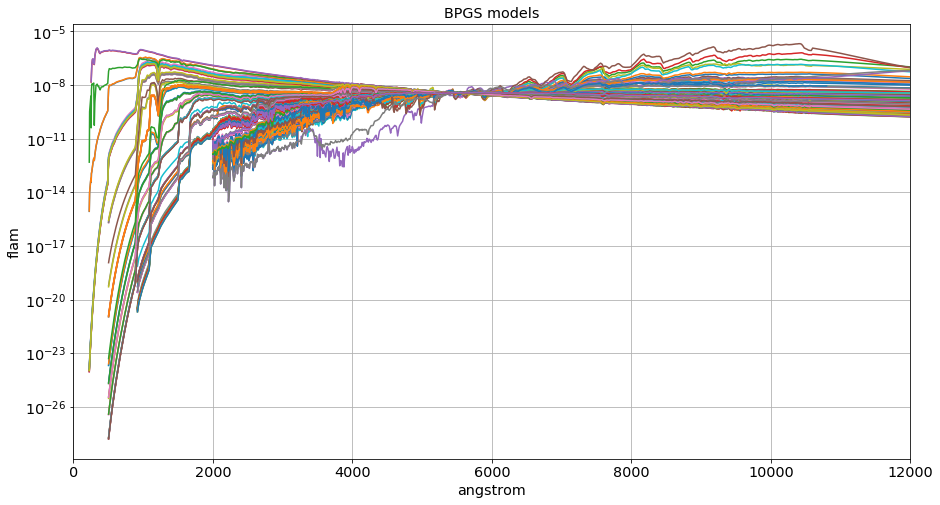

In [22]:
for keyobj in OBJDict:
    the_file=OBJDict[keyobj]
        
    selected_file=the_file
    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
    sed=S.FileSpectrum(selected_fullfile)
        
    plt.semilogy(sed.wave,sed.flux,label=keyobj)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    #plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("BPGS models")
    plt.savefig("bpgs.png")